In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [77]:
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',','').astype('int64')
#converting the column to int type so that we can plot the variable and use it in further analysis

In [78]:
df.dtypes #datatypes of column

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_per_capita ($)      int64
generation             object
gdp_for_year ($)        int64
dtype: object

In [5]:
df.shape #shape of dataframe

(27820, 12)

In [79]:
df.info() #information about data frame, here we see that HDI has very few non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
 11  gdp_for_year ($)    27820 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [80]:
df.isnull().sum() #counting how many null values are there. HDI has more than 0.6 % data missing so will drop it.

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
gdp_for_year ($)          0
dtype: int64

In [99]:
df.drop('HDI for year',inplace=True, axis=1)

In [100]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_per_capita ($)', 'generation',
       'gdp_for_year ($)'],
      dtype='object')

In [82]:
df.nunique() #checking for number of unique values present

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
gdp_per_capita ($)     2233
generation                6
gdp_for_year ($)       2321
dtype: int64

In [84]:
for col in df.columns:    #checking for number for missing values
    if df[col].isna().sum() >1:
        print('Missing values in',col,'is',df[col].isna().sum())
    else:
        print('No missing values in',col) 

No missing values in country
No missing values in year
No missing values in sex
No missing values in age
No missing values in suicides_no
No missing values in population
No missing values in suicides/100k pop
No missing values in country-year
Missing values in HDI for year is 19456
No missing values in gdp_per_capita ($)
No missing values in generation
No missing values in gdp_for_year ($)


In [86]:
cat_feat = [col for col in df.columns if df[col].dtypes == 'O']  #storing categorical variables
cat_feat

['country', 'sex', 'age', 'country-year', 'generation']

In [101]:
num_feat = [col for col in df.columns if df[col].dtypes != 'O'] #storing numerical variables
num_feat

['year',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'gdp_for_year ($)']

'Most distribution are right skewed'

<Figure size 1368x720 with 0 Axes>

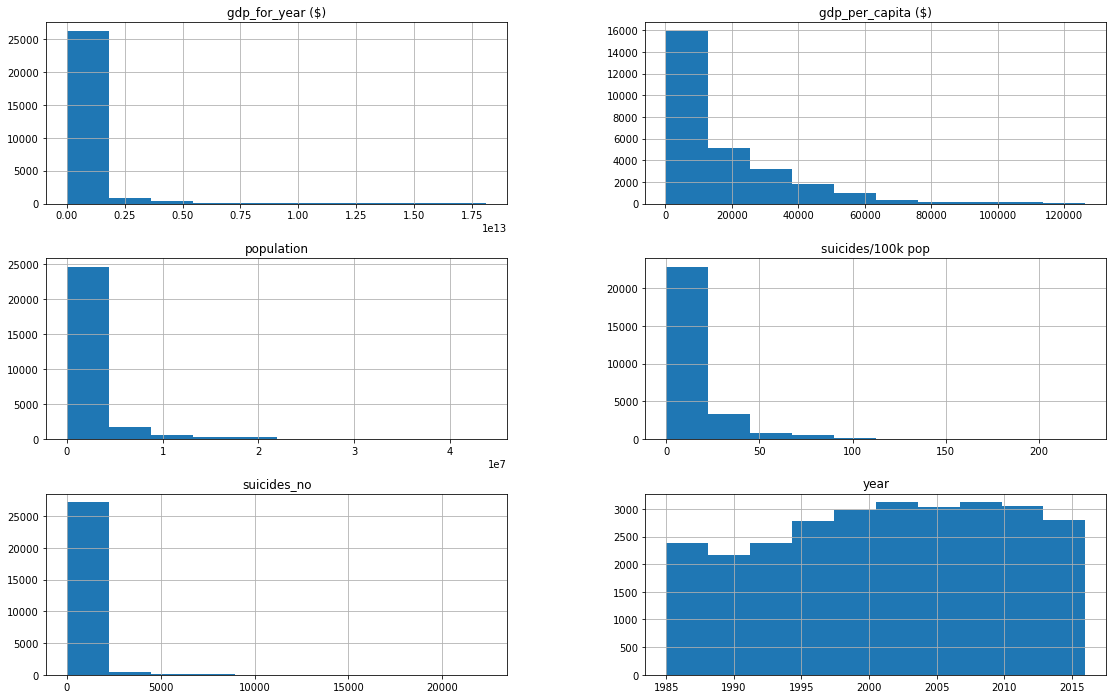

In [103]:
plt.figure(figsize = (19,10))      #to see the distribution of numerical data, plotting historical data
df.hist(num_feat,figsize = (19,12)) 
'''Most distribution are right skewed'''

In [104]:
df.describe(include='all') #population and gdp for year are large scale values, so we have to scale it down.
#The max and the 75th Percentile values differ much in most cases which implies presence of outliers

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation,gdp_for_year ($)
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820.000000,27820,2.782000e+04
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,6,NaN
top,Austria,NaN,female,35-54 years,NaN,NaN,NaN,Oman2010,NaN,Generation X,NaN
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,6408,NaN
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,16866.464414,NaN,4.455810e+11
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,18887.576472,NaN,1.453610e+12
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,251.000000,NaN,4.691962e+07
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,3447.000000,NaN,8.985353e+09
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,9372.000000,NaN,4.811469e+10
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,24874.000000,NaN,2.602024e+11


female    13910
male      13910
Name: sex, dtype: int64


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


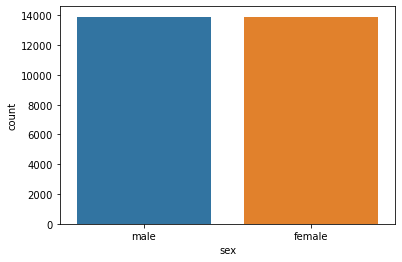

In [105]:
sns.countplot(df['sex'])
print(df.sex.value_counts())

<AxesSubplot:>

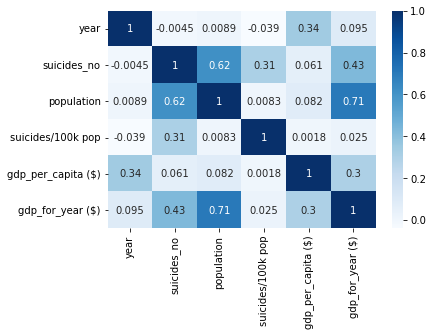

In [110]:
sns.heatmap(df.corr(),annot=True,cmap='Blues') #understanding about the correlation between features
#Population and suicides numbers are much correlated
#Strong correlation between population and gdp for year is observed.
#Suicides number and gdo for year is somewhat correlated so as Gdp per capita and Year

Text(0.5, 1.0, 'By Country')

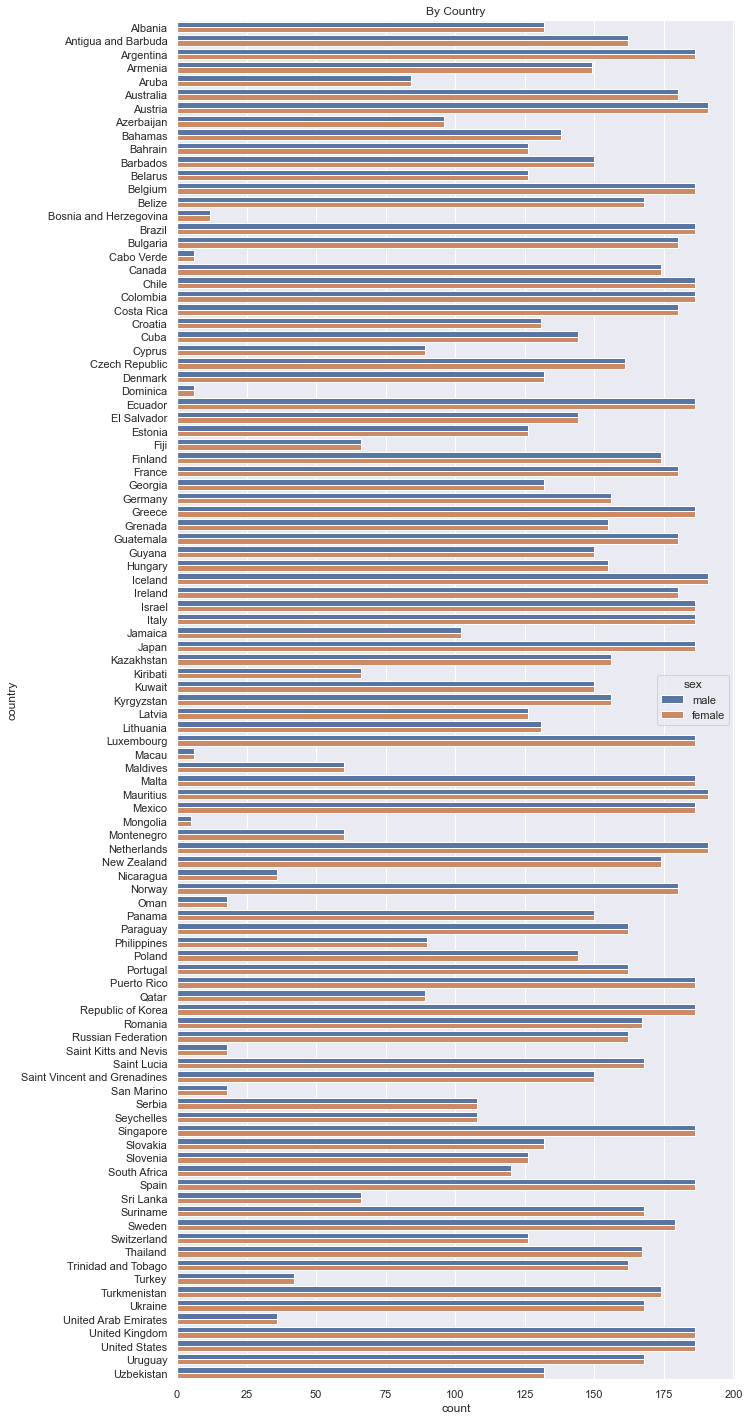

In [129]:
#Let's see suicide rate by country
plt.figure(figsize=(10,25))
sns.set_theme(style='darkgrid')
sns.countplot(y=df['country'],hue=df['sex'])
plt.title('By Country')

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

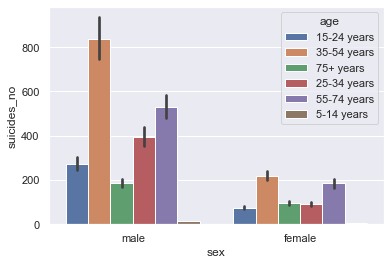

In [132]:
sns.barplot(y='suicides_no',x='sex' ,hue='age', data=df)
#Observation: In both males and females: the maximum suicide rate occurs between 35-54 Years and 55-74 Years

'Silent Gen: 1901-1927 GIGen: 1928-1945 Boomer Gen: 1946-1964  Gen X:1965-1980, Gen Millenials: 1981-1996, Gen Z: 1997-2012'

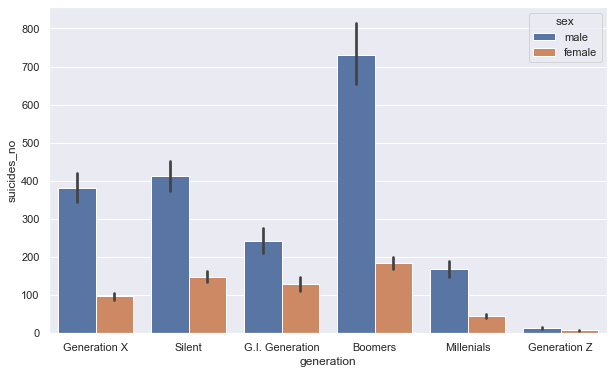

In [197]:
#eeing which generation people suicide the most
plt.figure(figsize=(10,6))
sns.barplot(y='suicides_no',x='generation',hue='sex',data=df)
#Observation: In Boomers generation particularly male has shown a higher tendency for suicide rates 
#Reasons for most suicide cases in elder people are depression, social isolation, substance abuse, poor physical health or function, financial stress,etc
'''Silent Gen: 1901-1927 GIGen: 1928-1945 Boomer Gen: 1946-1964  Gen X:1965-1980, Gen Millenials: 1981-1996, Gen Z: 1997-2012'''

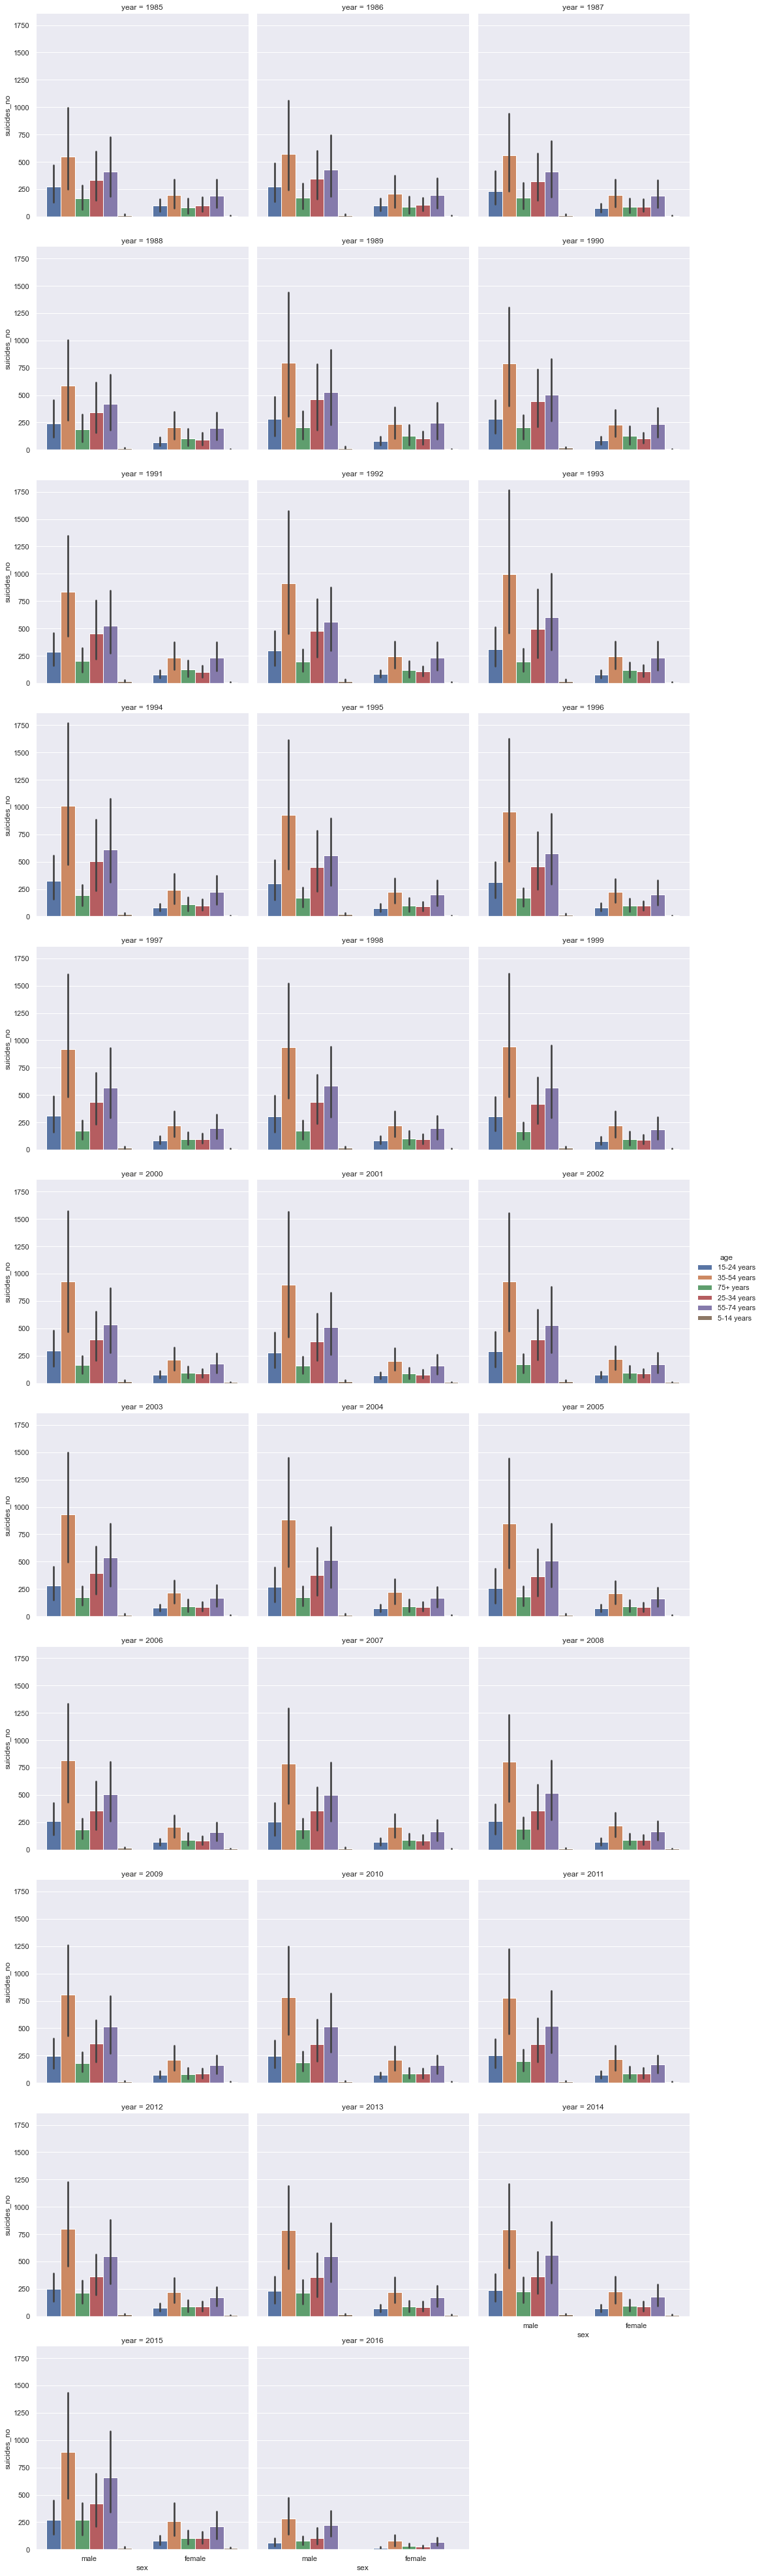

In [155]:
#Let's now see year wise suicide rates from 1985-2016
sns.catplot(y='suicides_no',x='sex',col='year',kind='bar',hue='age',data=df,col_wrap=3)

In [173]:
df1 = df.groupby(['year'],sort=True)['suicides_no'].sum()
df1.sort_values(ascending=False) 
#in 1999 the most suicide rates were recorded

year
1999    256119
2002    256095
2003    256079
2000    255832
2001    250652
1998    249591
1996    246725
1995    243544
2009    243487
2004    240861
1997    240745
2010    238702
2011    236484
2008    235447
2005    234375
2007    233408
2006    233361
1994    232063
2012    230160
2013    223199
2014    222984
1993    221565
1992    211473
2015    203640
1991    198020
1990    193361
1989    160244
1987    126842
1988    121026
1986    120670
1985    116063
2016     15603
Name: suicides_no, dtype: int64

In [174]:
df.country.nunique() #there are 101 countries listed in the dataset

101

In [180]:
df2=df.groupby(['country'])['suicides_no'].sum()  #top 5 countries with most suicide numbers
df2.sort_values(ascending=False).head()

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Name: suicides_no, dtype: int64

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

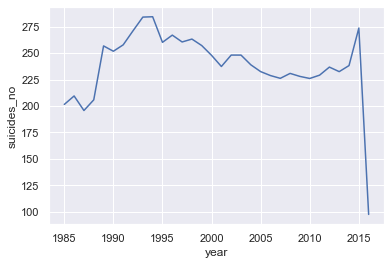

In [190]:
sns.lineplot('year','suicides_no',data=df,ci=None) #trend in suicide rates over the years.

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'Observation: Male have highest suicide numbers than females, although females are more likely to be diagonised with depression and attempt suicide. The reason behind this is that male suicide\nmethods are more voilent leading to death before any further intervention from outside'

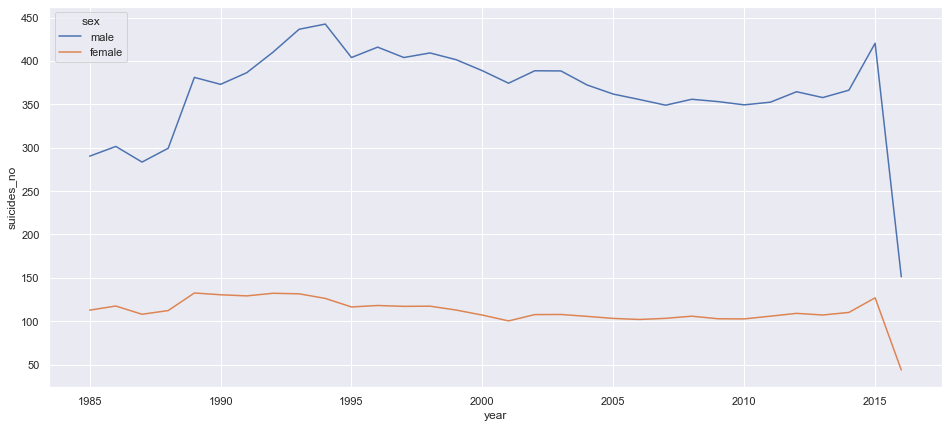

In [198]:
plt.figure(figsize=(16,7))
sns.lineplot('year','suicides_no',hue='sex',data=df,ci=None)
'''Observation: Male have highest suicide numbers than females, although females are more likely to be diagonised with depression and attempt suicide. The reason behind this is that male suicide
methods are more voilent leading to death before any further intervention from outside'''

'Observations: People b/w 35-54 years have shown highest suicide number over the years'

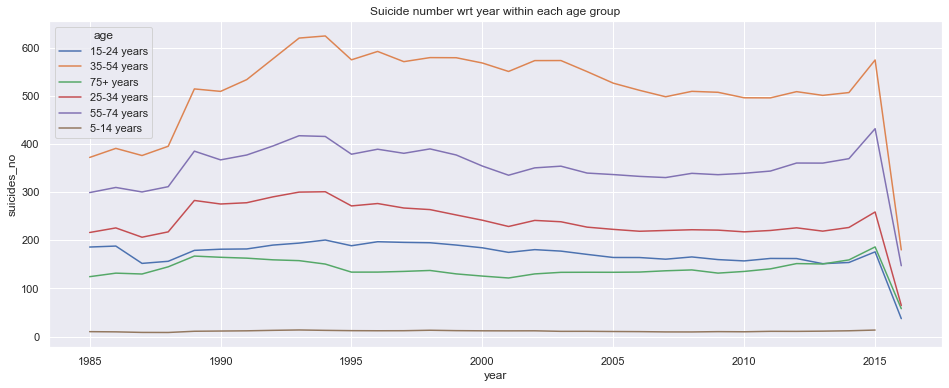

In [199]:
plt.figure(figsize=(16,6))
sns.lineplot(x='year',y='suicides_no',data=df,hue='age',ci=None)
plt.title("Suicide number wrt year within each age group")
'''Observations: People b/w 35-54 years have shown highest suicide number over the years'''